In [1]:
import sys
sys.path.append("..")

from models.adversarial.dcgan import Generator, weights_init
from models.adversarial.wgan import Critic
from models.adversarial.train import train_wgan_gp

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from utils.data import visualize_dataset, cherry_pick_samples, samples_to_gif
from utils.plots import plot_losses

In [2]:
ts = transforms.Compose([
    transforms.Resize([64,64]),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.5, 0.5, 0.5),
        std=(0.5, 0.5, 0.5),
    )
])

ds = ImageFolder(
    root="../datasets/celeba",
    transform=ts
)

dl = DataLoader(
    ds, 
    batch_size=64, 
    shuffle=True, 
    num_workers=0, 
    pin_memory=False
)

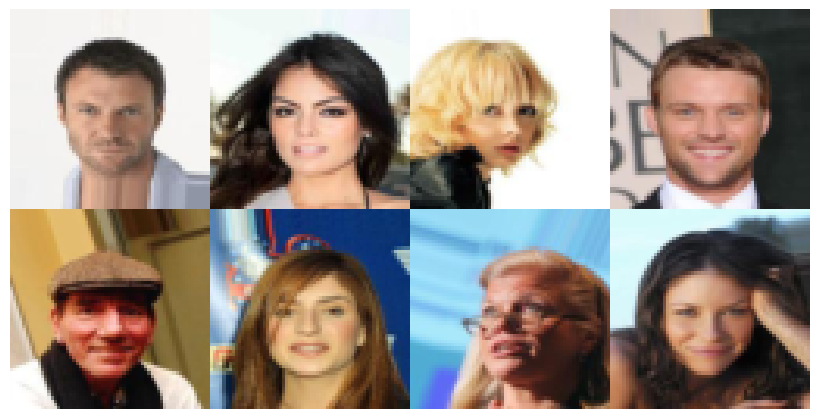

In [3]:
visualize_dataset(dl, 8, 4)

In [ ]:
g = Generator(
    nz=100,
    nc=3,
    ngf=64
)
c = Critic(
    nc=3,
    ndf=64
)

g.apply(weights_init)
c.apply(weights_init)

generator, critic, g_losses, c_losses = train_wgan_gp(
    g=g,
    c=c,
    dataloader=dl,
    epochs=50,
    device=torch.device("mps" if torch.backends.mps.is_available() else "cpu"),
    nz=100,
    lr=2e-4,
    beta1=0.5,
    out_dir="../outputs", 
    sample_every=300,
)

WGAN-GP Epochs:   0%|          | 0/50 [00:18<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
samples_to_gif(
    samples_dir="../outputs/samples",
    out_path="../outputs/training_progress.gif",
    duration=200,
)

In [ ]:
cherry_pick_samples(
    generator=g,
    nz=100,
    device="mps",
    total=25,
    save_path="../outputs/cherry_picked.png",
)

In [ ]:
plot_losses(
    {"Generator": g_losses, "Discriminator": c_losses},
    log_y=False,
)